### COMP 6245: Introduction to Linear Regression

First we import the libraries required

In [2]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals



%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
# These steps are typically always called.  The "matplotlib inline" is to display figures in this notebook itself 


import pandas as pd 
# pandas is a library for handling datasets; you will see some useful built-in functions in action

import os # to move around your operating system

import scipy as sp  # scientific computation library

from mpl_toolkits.mplot3d import axes3d # in case we need to plot in 3D z=f(x,y)
import seaborn as sns  # another package for pretty graphs

# Scikit-learn (sklearn) is a powerful and fairly comprehensive library of ML algorithms

from sklearn import datasets
from sklearn.neighbors.kde import KernelDensity

#### Define X coordinates

In [3]:

# set ranges for min and max values of x and number of pts u want

xmin, xmax, npts = [-4, 10, 50]

# np.linspace() return a list of evenly spaced nos over the specified intervals

X = np.linspace(start=xmin, stop=xmax, num=npts)


#### Creaing the y coordinates

We create the y coordinates corresponding to each x coordinate. While creating the y coordinates we add noise to the data to make it deviate from the st line **y = mx + b**

In [5]:
def f1(x, m, c):
    return m*x + c

# Create data from ground truth function that is corrupted by additive Gaussian noise of mean 0 and std. dev. 4
y0 = f1(X, -3., 9.) + np.random.normal(0,scale=4, size=np.shape(X))  


#### Visualizing the pts

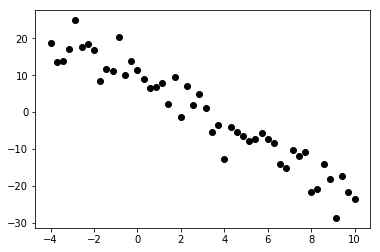

In [6]:
plt.scatter(X, y0, marker='o', c='k')

#### Creating the Design matrix

The Design matrix looks like:

\begin{bmatrix}1 & X_{0} \\1 & X_{1}\\... & ... \\1 & X_{49} \end{bmatrix}

The size of this matrix is **N * 2** where N = 50 (the no of data pts)

In [11]:
def designmat1(Xmat):
    X = np.atleast_2d(Xmat).T
    col1 = np.ones(np.shape(X)[0]).reshape(np.shape(X)[0],1)
    X = np.concatenate((col1, X), axis=1) 
    return X

Xmat = designmat1(X)

print (Xmat[:10])

[[ 1.         -4.        ]
 [ 1.         -3.71428571]
 [ 1.         -3.42857143]
 [ 1.         -3.14285714]
 [ 1.         -2.85714286]
 [ 1.         -2.57142857]
 [ 1.         -2.28571429]
 [ 1.         -2.        ]
 [ 1.         -1.71428571]
 [ 1.         -1.42857143]]


We want to learn weights for the line:

$y = mx + b$

Here m and b are the wts of the line, which we want to learn over time through the process of **Gradient Descent**

The loss function (L) is given by:

$ L = \frac{1}{N}\sum_1^n(y - y_{predicted})^{2}$

$=\frac{1}{N}\sum_1^n(y - (w_{0} + w_{1}x))^{2} \rightarrow eqn1$

**Here m = w0 and b = w1**


In Gradient Descent the idea is to update the wts after each iteration

$w_{0} = w_{0} + learningRate \times \frac{\partial L}{\partial w_{0}} \rightarrow eqn2$

$w_{1} = w_{1} + learningRate \times \frac{\partial L}{\partial w_{1}} \rightarrow eqn3$

From these eqns we get:

![](./data/img/diag1.png)

![](./data/img/diag2.png)

#### The main() function

In [ ]:
def main():
    
    